In [1]:
# Para tratamiento de datos:
# ----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [5]:
customer_total = pd.read_csv('Customer Total.csv')

In [6]:
customer_total.head()

,Loyalty Number,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0
2,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.0,0,0
3,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.0,0,0
4,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335.0,465,38


# Fase 2: Visualización

Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes
gráficas usando la mejor gráfica que consideres:
2 / 4

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?
3. ¿Cuál es la distribución de los clientes por provincia o estado?
4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
6. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [ ]:
# 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

# Se agrupa previamente por año y mes haciendo referencia a los vuelos reservados
vuelos_mensuales = customer_total.groupby(['Year', 'Month'])['Flights Booked'].sum().reset_index()
print(vuelos_mensuales)


    Year  Month  Flights Booked
0   2017      1           47766
1   2017      2           47691
2   2017      3           64271
3   2017      4           55720
4   2017      5           65279
5   2017      6           80493
6   2017      7           89288
7   2017      8           78692
8   2017      9           63304
9   2017     10           60351
10  2017     11           56905
11  2017     12           77650
12  2018      1           49170
13  2018      2           48643
14  2018      3           66928
15  2018      4           56791
16  2018      5           76891
17  2018      6           92749
18  2018      7          104143
19  2018      8           90512
20  2018      9           73075
21  2018     10           69110
22  2018     11           65345
23  2018     12           88397


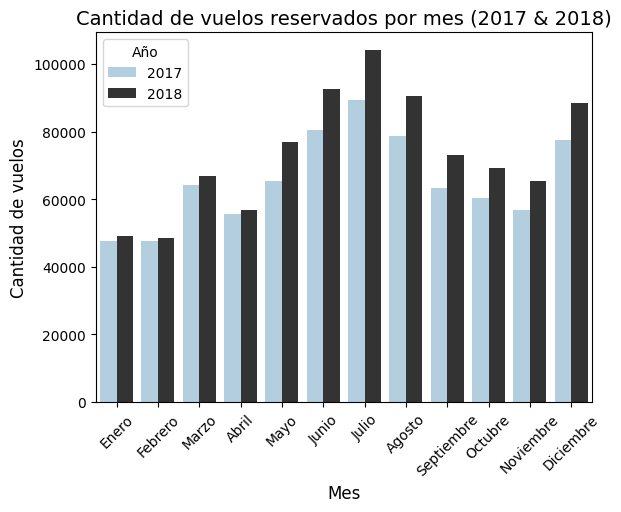

In [28]:
# Crear el gráfico
sns.barplot(data=vuelos_mensuales, x='Month', y='Flights Booked', hue='Year', palette='Blues_d')

# Títulos
plt.title('Cantidad de vuelos reservados por mes (2017 & 2018)', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de vuelos', fontsize=12)
plt.xticks(range(0, 12), labels=[
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
plt.legend(title='Año')
plt.show()

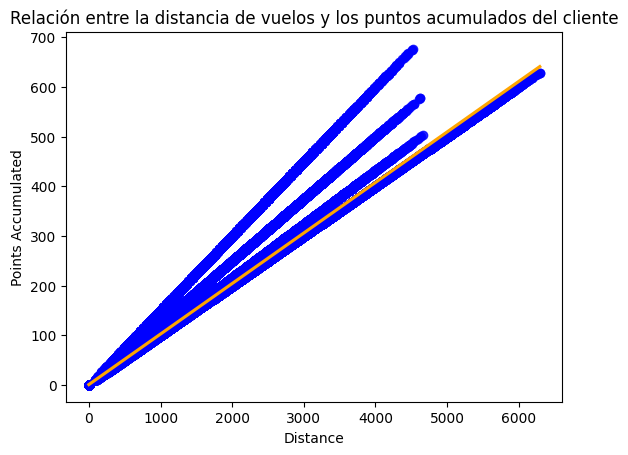

In [27]:
# 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

# Crear el gráfico
sns.regplot(x='Distance', 
            y='Points Accumulated', 
            data=customer_total, 
            scatter_kws={'marker': 'o', 'color': 'blue'},  
            line_kws={'color': 'orange'})  

# Títulos
plt.xlabel('Distance')
plt.ylabel('Points Accumulated')
plt.title('Relación entre la distancia de vuelos y los puntos acumulados del cliente')
plt.show()

In [30]:
# 3. ¿Cuál es la distribución de los clientes por provincia o estado?

# Se agrupa la columna de las provincias haciendo referencia a los clientes 
provincias = customer_total.groupby('Province')['Loyalty Number'].count().reset_index()
provincias

,Province,Loyalty Number
0,Alberta,23360
1,British Columbia,106442
2,Manitoba,15900
3,New Brunswick,15352
4,Newfoundland,6244
5,Nova Scotia,12507
6,Ontario,130258
7,Prince Edward Island,1584
8,Quebec,79573
9,Saskatchewan,9861


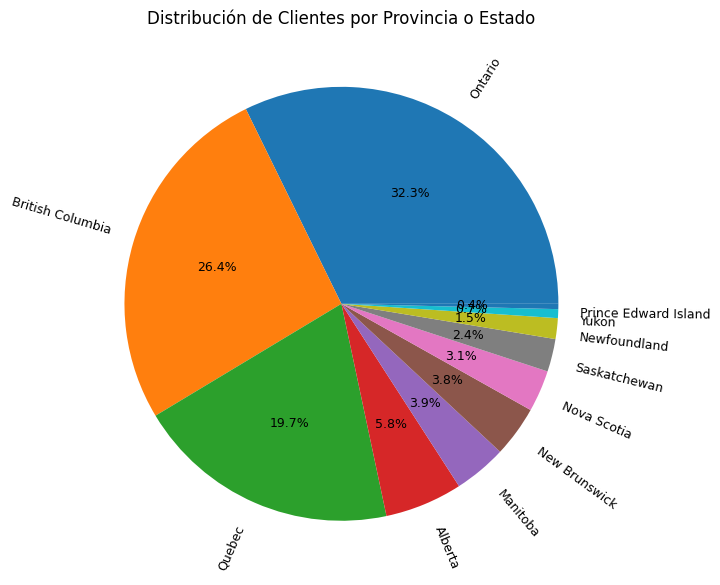

In [ ]:
# Crear el gráfico

# Contar la cantidad de clientes por provincia o estado
provincias = customer_total['Province'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(provincias.values, 
        labels=provincias.index,  
        autopct='%1.1f%%',         
        textprops={'fontsize': 9}, 
        rotatelabels=45          
        )  

# Título
plt.title('Distribución de Clientes por Provincia o Estado')

plt.show()

In [48]:
# 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

# Agrupar educación haciendo referencia al salario y sacar el promedio del salario
promedio_salario= customer_total.groupby('Education')['Salary'].mean().reset_index()
promedio_salario

,Education,Salary
0,Bachelor,72599.080913
1,College,73455.000000
2,Doctor,178403.675202
3,High School or Below,61146.378165
4,Master,103734.523724


C:\Users\Anita\AppData\Local\Temp\ipykernel_8540\880222051.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedio_salario, x='Education', y='Salary', palette='viridis')


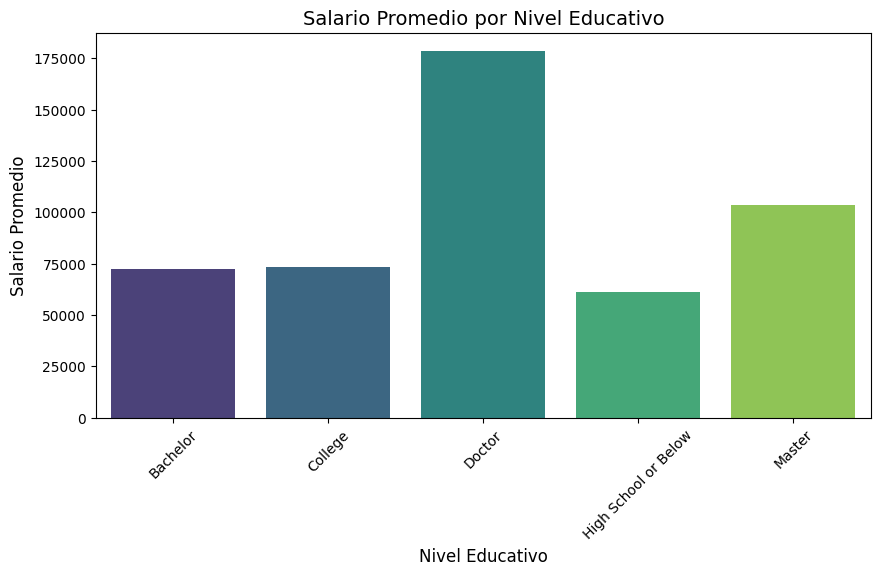

In [51]:
# Cargar el gráfico

plt.figure(figsize=(10, 5))
sns.barplot(data=promedio_salario, x='Education', y='Salary', palette='viridis')

# Títulos y etiquetas
plt.title('Salario Promedio por Nivel Educativo', fontsize=14)
plt.xlabel('Nivel Educativo', fontsize=12)
plt.ylabel('Salario Promedio', fontsize=12)
plt.xticks(rotation=45)  
plt.show()

In [52]:
# 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

# Agrupamos los tipos de tarjeta haciendo referencia a los clientes
tarjetas = customer_total.groupby('Loyalty Card')['Loyalty Number'].count().reset_index()
tarjetas

,Loyalty Card,Loyalty Number
0,Aurora,83132
1,Nova,136883
2,Star,183745


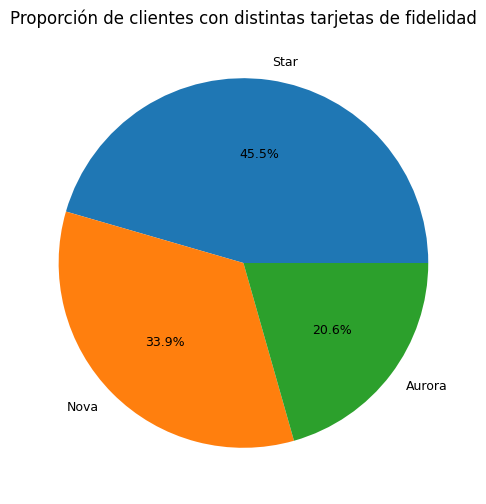

In [ ]:
# Contar la cantidad de clientes por tarjetas
tarjetas = customer_total['Loyalty Card'].value_counts()

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.pie(tarjetas.values, 
        labels=tarjetas.index,  
        autopct='%1.1f%%',  
        textprops={'fontsize': 9}) 

# Título
plt.title('Proporción de clientes con distintas tarjetas de fidelidad')

plt.show()

In [65]:
# 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

# Se agrupa la distribución por género y estado civil haciendo referencia a los clientes

distribución = customer_total.groupby(['Gender', 'Marital Status'])['Loyalty Number'].count().reset_index()
distribución

,Gender,Marital Status,Loyalty Number
0,Female,Divorced,30634
1,Female,Married,117363
2,Female,Single,54760
3,Male,Divorced,30128
4,Male,Married,117482
5,Male,Single,53393


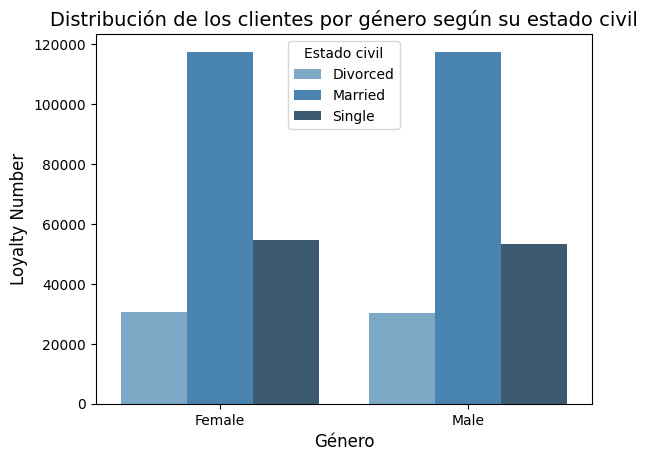

In [67]:
# Crear el gráfico
sns.barplot(data=distribución, x='Gender', y='Loyalty Number', hue='Marital Status', palette='Blues_d')

# Títulos
plt.title('Distribución de los clientes por género según su estado civil', fontsize=14)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Loyalty Number', fontsize=12)

plt.legend(title='Estado civil')
plt.show()

# RESULTADOS

1. Se aprecia que se reservaron más vuelos en 2018, especialmente en julio con mas de 10 mil vuelos. También mencionar que en ambos años el mayor número de vuelos es en el periodo de verano (junio a agosto) y en el de navidad siendo diciembre el más destacable.

2. Sí que hay relación. Cuanto más viajan los clientes más puntos acumulan.

3. Residen en Ontario más de un 30% de los clientes, convirtiendose esta provincia en la número 1, seguida de British Columbia y Quebec. 

4. Hay una gran diferencia de salario. Ganan más cuando tienen un doctorado, el del medio sonm los que han estudiado un master y los menores los restantes. 

5. Casi un 50% de los clientes tienen la tarjeta Star, seguida de la tarjeta Nova y, por último, la Aurora, siendo esta última la que tiene más valor. 

6. Hay más casados, sean hombres o mujeres.